# Lab 07.04.2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm, notebook

In [2]:
def get_vert(pos):
    x = np.asarray([np.subtract(pos[i+1], pos[i]) for i in range(pos.shape[0]-1)])
    x_norm = [np.sqrt(n[0]**2 + n[1]**2) for n in x]
    return x, x_norm

In [3]:
def get_angles(vert, l_norm):
    x = [(-np.inner(vert[i+1], vert[i])/(l_norm[i+1]*l_norm[i])) for i in range(vert.shape[0]-1)]
    return x

In [70]:
def get_energy(vert, angles, n):
    # en = [(0.5*k*(vert[i-1] - l0)**2 + kb*(1+angles[i]) + 0.5*k*(vert[i-1] - l0)**2) for i in range(0, len(angles))]
    en = []
    num = len(angles)
    for i in range(0, num):
        e = (0.5*k*(vert[i] - l0)**2 + kb*(1+angles[i]) + 0.5*k*(vert[i+1] - l0)**2)
        en.append(e)
    e = (0.5*k*(vert[num] - l0)**2 + kb*(1+angles[num-1]) + 0.5*k*(vert[num] - l0)**2)
    en.append(e)
    if n == 0:
        en = np.sum(en[n:n+2])/4
    elif n == len(vert):
        en = np.sum(en[n-2:-1])/4
    else:
        en = np.sum(en[n-1:n+2])/8
    return en

In [5]:
def calc_delta_en(pos, vert, angles, n):
    e_old = get_energy(vert, angles, n)
    pos_n = pos.copy()
    ds = [np.random.uniform(-s,s),np.random.uniform(-s,s)]
    pos_n[n] = pos_n[n] + ds
    l_arr, l_norm = get_vert(pos_n)
    e_new = get_energy(l_norm, get_angles(l_arr, l_norm), n)
    delta_e = (e_new - e_old)
    return delta_e, pos_n

In [6]:
def monte_carlo_single(pos, vert, angles, n, verb=0):
    delta_e, new_pos = calc_delta_en(pos, vert, angles, n)
    # proba = np.exp(-delta_e/kbT)
    # if min(1, proba) > np.random.random():
    if delta_e < 0:
        if verb > 0:
            print("Accepted!")
        pos = new_pos
    else:
        if verb > 0:
            print("Rejected!")
    return pos

In [71]:
k = 1E+3
l0 = 1.0
kb = 1E+2
N = 5E+1
L0 = N*l0
kbT = 1E-1
s = 0.001
strain = 0.01
it_num = 5000
pos = np.asarray([[l0*num, 0] for num in range(int(N))])
pos[0][0] += 0.5*np.abs(strain)*L0
pos[-1][0] -= 0.5*np.abs(strain)*L0
pos_ini = pos
l_arr, l_norm = get_vert(pos)
angle = get_angles(l_arr, l_norm)
energies = [get_energy(l_norm, angle, n) for n in range(int(N))]

In [8]:
%%time
print("Initial Energy: {}".format(np.sum([get_energy(l_norm, angle, n) for n in range(int(N)-1)])/(3*N)))

for it in notebook.tqdm (range (it_num), desc="Loading..."):
    for n in range(1, len(pos)-1):
        pos = monte_carlo_single(pos, l_norm, angle, n, verb=0)

l_arr, l_norm = get_vert(pos)
angle = get_angles(l_arr, l_norm)
print("New Energy: {}".format(np.sum([get_energy(l_norm, angle, n) for n in range(int(N)-1)])/(3*N)))

Initial Energy: 0.078125


Loading...: 100%|█████████████████████████████| 5000/5000 [01:14<00:00, 67.02it/s]

New Energy: 0.07440836033223776
CPU times: user 1min 13s, sys: 2.52 s, total: 1min 15s
Wall time: 1min 14s


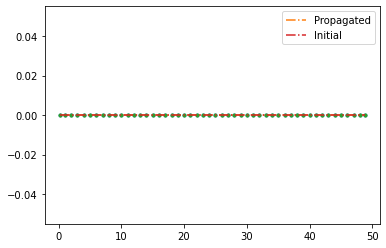

In [8]:
plt.plot(pos[:, 0], pos[:, 1], marker=".", ls="")
plt.plot(pos[:, 0], pos[:, 1], ls="-.", label="Propagated")

plt.plot(pos_ini[:, 0], pos_ini[:, 1], marker=".", ls="")
plt.plot(pos_ini[:, 0], pos_ini[:, 1], ls="-.", label="Initial")

plt.legend()

In [9]:
energies

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [10]:
angle

[-1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0]

In [11]:
pos

array([[ 0.25,  0.  ],
       [ 1.  ,  0.  ],
       [ 2.  ,  0.  ],
       [ 3.  ,  0.  ],
       [ 4.  ,  0.  ],
       [ 5.  ,  0.  ],
       [ 6.  ,  0.  ],
       [ 7.  ,  0.  ],
       [ 8.  ,  0.  ],
       [ 9.  ,  0.  ],
       [10.  ,  0.  ],
       [11.  ,  0.  ],
       [12.  ,  0.  ],
       [13.  ,  0.  ],
       [14.  ,  0.  ],
       [15.  ,  0.  ],
       [16.  ,  0.  ],
       [17.  ,  0.  ],
       [18.  ,  0.  ],
       [19.  ,  0.  ],
       [20.  ,  0.  ],
       [21.  ,  0.  ],
       [22.  ,  0.  ],
       [23.  ,  0.  ],
       [24.  ,  0.  ],
       [25.  ,  0.  ],
       [26.  ,  0.  ],
       [27.  ,  0.  ],
       [28.  ,  0.  ],
       [29.  ,  0.  ],
       [30.  ,  0.  ],
       [31.  ,  0.  ],
       [32.  ,  0.  ],
       [33.  ,  0.  ],
       [34.  ,  0.  ],
       [35.  ,  0.  ],
       [36.  ,  0.  ],
       [37.  ,  0.  ],
       [38.  ,  0.  ],
       [39.  ,  0.  ],
       [40.  ,  0.  ],
       [41.  ,  0.  ],
       [42.  ,  0.  ],
       [43.

In [12]:
l_arr

array([[0.75, 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  ,

In [13]:
l_norm

[0.75,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.75]